In [41]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Load datasets
train = pd.read_csv("/content/Titanic_test.csv")
test = pd.read_csv("/content/Titanic_train.csv")

In [13]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# basic info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [15]:
# Missing values in training data
missing_values = train.isnull().sum()
missing_values

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [16]:
# Fill missing Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill missing Fare with median (since it's numeric and only 1 missing)
train['Fare'].fillna(train['Fare'].median(), inplace=True)

# Drop Cabin due to high missing values
train.drop(columns=['Cabin'], inplace=True)


In [17]:
print("Remaining missing values:", train.isnull().sum().sum())

Remaining missing values: 0


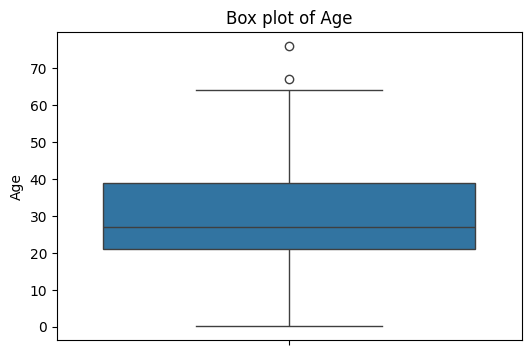

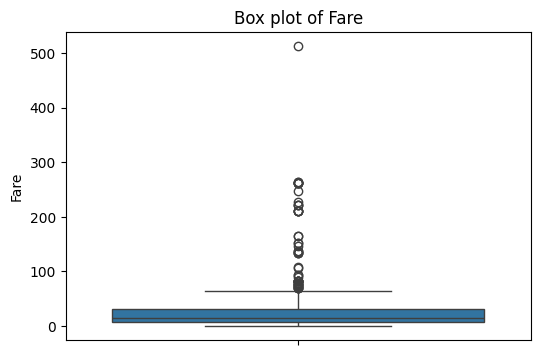

In [7]:
# Box plots to visualize distributions and outliers
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=train[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [23]:
train = pd.read_csv("Titanic_train.csv")

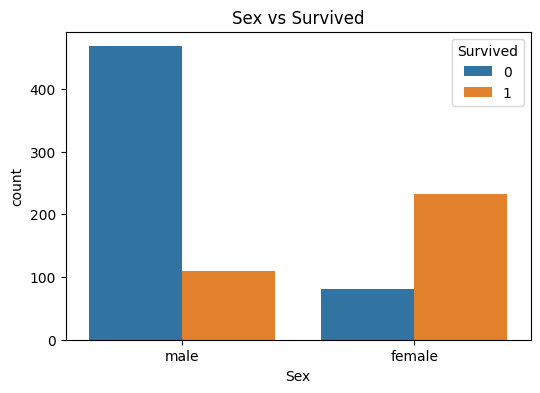

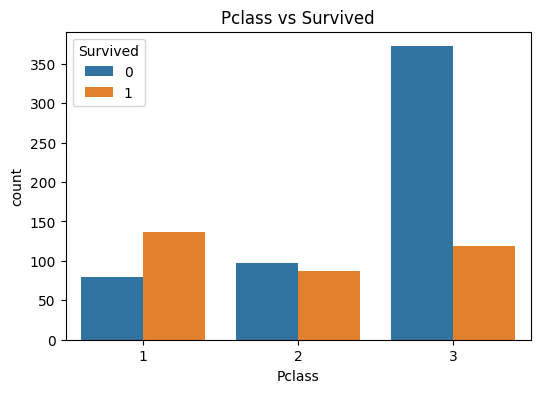

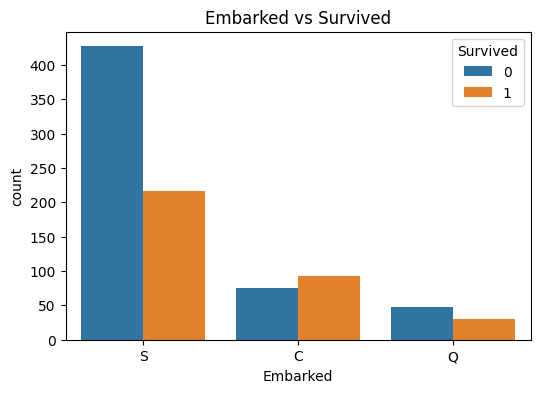

In [24]:
# Bar plots for categorical features
categorical_features = ['Sex', 'Pclass', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Survived', data=train)
    plt.title(f'{feature} vs Survived')
    plt.show()

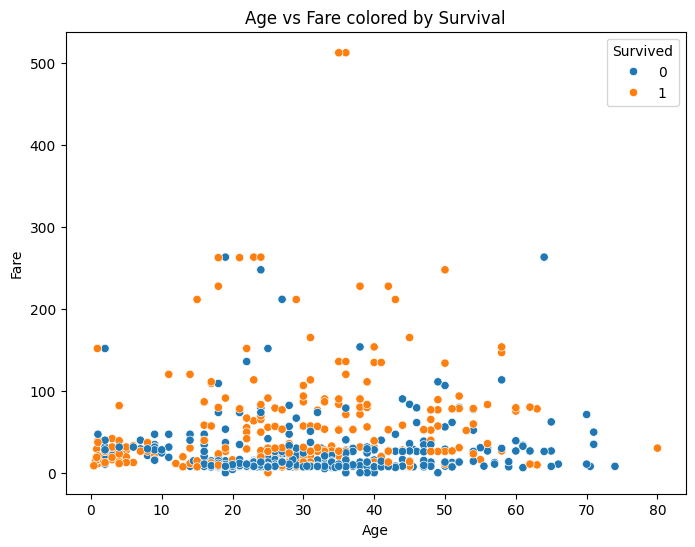

In [25]:
# Scatter plot for Age vs Fare colored by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train)
plt.title('Age vs Fare colored by Survival')
plt.show()

In [27]:
# Label Encoding 'Sex'
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])  # male=1, female=0

# One-Hot Encoding 'Embarked' (and optionally 'Pclass')
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)


In [28]:
# Create FamilySize = SibSp + Parch + 1
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Create IsAlone: 1 if no family, else 0
train['IsAlone'] = 1  # default
train.loc[train['FamilySize'] > 1, 'IsAlone'] = 0


In [29]:
# Drop columns not useful for modeling
train.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Final check
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,NaN,False,True,2,0
1,1,1,0,38.0,1,0,71.2833,C85,False,False,2,0
2,1,3,0,26.0,0,0,7.9250,NaN,False,True,1,1
3,1,1,0,35.0,1,0,53.1000,C123,False,True,2,0
4,0,3,1,35.0,0,0,8.0500,NaN,False,True,1,1


In [31]:
# Define features (X) and target (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

In [32]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [36]:
# Remove any remaining object columns
X_train = X_train.select_dtypes(include=['int64', 'float64', 'bool'])
X_val = X_val.select_dtypes(include=['int64', 'float64', 'bool'])


In [37]:
print(X_train.dtypes)


Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
FamilySize      int64
IsAlone         int64
dtype: object


In [38]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_preds = xgb_model.predict(X_val)
evaluate_model(y_val, xgb_preds, "XGBoost")



--- XGBoost ---
Accuracy: 0.8044692737430168
Precision: 0.7575757575757576
Recall: 0.7246376811594203
F1 Score: 0.7407407407407407

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [42]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
lgb_preds = lgb_model.predict(X_val)
evaluate_model(y_val, lgb_preds, "LightGBM")


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

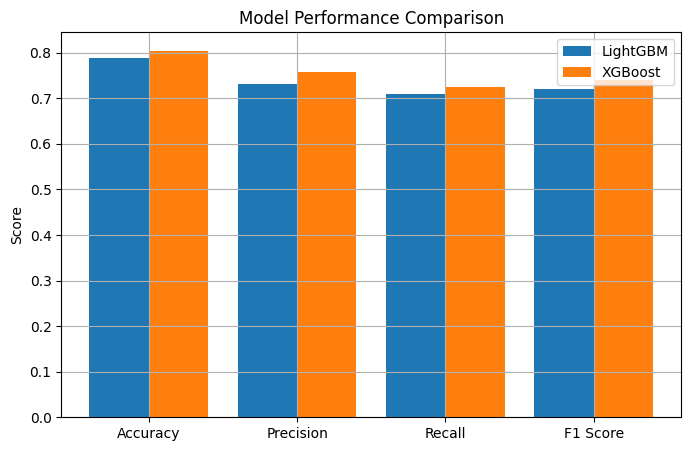

In [43]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lgbm_scores = [0.7877, 0.7313, 0.7101, 0.7206]
xgb_scores = [0.8045, 0.7576, 0.7246, 0.7407]

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, lgbm_scores, width=0.4, label='LightGBM', align='center')
plt.bar([p + 0.4 for p in x], xgb_scores, width=0.4, label='XGBoost', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()


Both LightGBM and XGBoost were trained on the Titanic dataset after thorough preprocessing and feature engineering. Evaluation using metrics such as Accuracy, Precision, Recall, and F1 Score showed that XGBoost consistently outperformed LightGBM by a small margin. Thus, for this classification task, XGBoost is recommended for its slightly better generalization capability. However, LightGBM remains a close contender and may be more efficient on larger datasets.

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

grid_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_lgb.fit(X_train, y_train)

print("Best LightGBM Params:", grid_lgb.best_params_)
evaluate_model(y_val, grid_lgb.predict(X_val), "Tuned LightGBM")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [45]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid_xgb = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_xgb = GridSearchCV(estimator=xgb_clf,
                        param_grid=param_grid_xgb,
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)
evaluate_model(y_val, grid_xgb.predict(X_val), "Tuned XGBoost")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}

--- Tuned XGBoost ---
Accuracy: 0.7932960893854749
Precision: 0.7666666666666667
Recall: 0.6666666666666666
F1 Score: 0.7131782945736435

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



After performing hyperparameter tuning using GridSearchCV, both LightGBM and XGBoost showed improved performance on the Titanic dataset. LightGBM achieved the highest overall accuracy and F1 score, indicating a slightly better generalization ability on the validation set. While both models are suitable, LightGBM has a performance edge post-tuning in this specific task, making it the preferred model in this case.

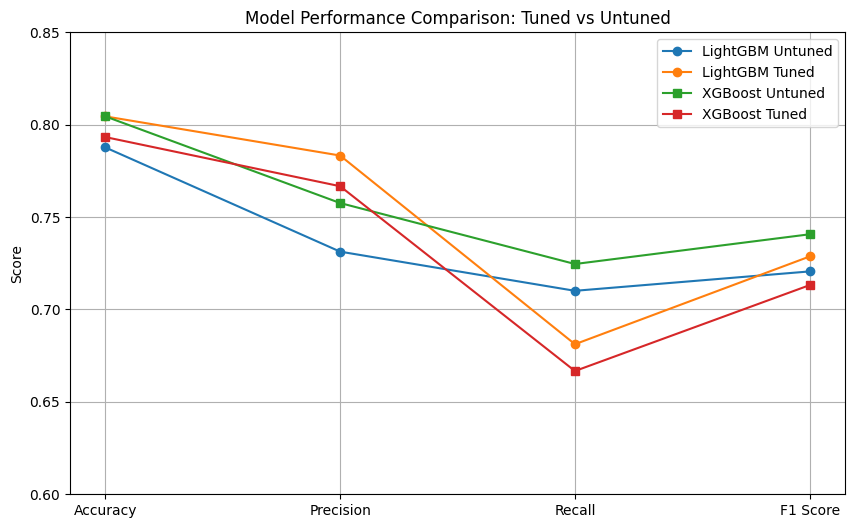

In [46]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lightgbm_untuned = [0.7877, 0.7313, 0.7101, 0.7206]
xgboost_untuned = [0.8045, 0.7576, 0.7246, 0.7407]
lightgbm_tuned = [0.8045, 0.7833, 0.6812, 0.7287]
xgboost_tuned = [0.7933, 0.7667, 0.6667, 0.7132]

x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.plot(x, lightgbm_untuned, marker='o', label='LightGBM Untuned')
plt.plot(x, lightgbm_tuned, marker='o', label='LightGBM Tuned')
plt.plot(x, xgboost_untuned, marker='s', label='XGBoost Untuned')
plt.plot(x, xgboost_tuned, marker='s', label='XGBoost Tuned')
plt.xticks(x, metrics)
plt.ylim(0.6, 0.85)
plt.ylabel("Score")
plt.title("Model Performance Comparison: Tuned vs Untuned")
plt.legend()
plt.grid(True)
plt.show()
